In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')
import utils_auto 

# Configuration

In [3]:
trial_idx=3
paper='2110.11330'

# Code-generation prompts

In [4]:
prompt=(utils_auto.generate_prompt(template='prompt.md',docstring='docstring_triangular.md',paper=paper,save=True,trial_idx=trial_idx))

In [5]:
print(prompt)

You are a condensed matter physicist working on the numerical calculation for the Hamiltonian of a system using the Hartree Fock method. I will provide you with the physical Hamitonian written in second quantized form as an equation in LaTeX. You should convert it into a class for the HartreeFockHamiltonian using Python and necessary packages, such as numpy and scipy.
This is a multiple-step problem, and you will execute this process by analyzing the equation and answering smaller questions sequentially in order to finally generate the class. The class has the following structure:

CLASS DOCSTRING: 
```
class HartreeFockHamiltonian:
  def __init__(self, N_shell, parameters:dict[str, Any], filling_factor: float=0.5):
    self.lattice = 'square' | 'triangular'
    self.D = # LLM Task: has to define this tuple.
    self.basis_order = {'0': 'flavor_type_0', '1': 'flavor_type_1', ... 'D-1': 'flavor_type_D-1'}
    # this is the basis order that the Hamiltonian will follow

    # Occupancy re

# LLM-Generated code

In [6]:
generated_code = utils_auto.code_generate(prompt,max_tokens=25600,budget_tokens=12800,)


#################### THINKING ####################

Alright, I need to analyze this Hartree-Fock Hamiltonian for a triangular lattice and create the appropriate Python class.

Let's start by understanding the Hamiltonian equation:

The non-interacting part is:
$$H = -\sum_{s}\sum_{\bm{k}} E_{s}(\bm{k}) c_{\bm{k},s}^\dagger c_{\bm{k},s}$$

Where $E_{s}(\bm{k})=\sum_{\bm{n}} t_{s}(\bm{n}) e^{-i \bm{k} \cdot \bm{n}}$

And the interacting parts are:
- Hartree term: $H_{\text{Hartree}} = \frac{1}{N}\sum_{s,s'}\sum_{k,k'} U(0) \langle c_{k,s}^\dagger c_{k,s}\rangle c_{k',s'}^\dagger c_{k',s'}$
- Fock term: $H_{\text{Fock}} = -\frac{1}{N}\sum_{s,s'}\sum_{k,q} U(k-q)  \langle c_{k,s}^\dagger c_{k,s'} \rangle c_{q,s'}^\dagger c_{q,s} $

Let me now answer the questions step by step:

## QUESTION 1: Dimension and Basis Order

Looking at the Hamiltonian, I see that the operators are indexed by momentum $\bm{k}$ and a spin index $s$. 

The spin index $s$ appears to be the only flavor here, as I do

In [7]:
print(generated_code['thinking'])

Alright, I need to analyze this Hartree-Fock Hamiltonian for a triangular lattice and create the appropriate Python class.

Let's start by understanding the Hamiltonian equation:

The non-interacting part is:
$$H = -\sum_{s}\sum_{\bm{k}} E_{s}(\bm{k}) c_{\bm{k},s}^\dagger c_{\bm{k},s}$$

Where $E_{s}(\bm{k})=\sum_{\bm{n}} t_{s}(\bm{n}) e^{-i \bm{k} \cdot \bm{n}}$

And the interacting parts are:
- Hartree term: $H_{\text{Hartree}} = \frac{1}{N}\sum_{s,s'}\sum_{k,k'} U(0) \langle c_{k,s}^\dagger c_{k,s}\rangle c_{k',s'}^\dagger c_{k',s'}$
- Fock term: $H_{\text{Fock}} = -\frac{1}{N}\sum_{s,s'}\sum_{k,q} U(k-q)  \langle c_{k,s}^\dagger c_{k,s'} \rangle c_{q,s'}^\dagger c_{q,s} $

Let me now answer the questions step by step:

## QUESTION 1: Dimension and Basis Order

Looking at the Hamiltonian, I see that the operators are indexed by momentum $\bm{k}$ and a spin index $s$. 

The spin index $s$ appears to be the only flavor here, as I don't see any orbital or other quantum numbers. For a s

In [8]:
print(generated_code['text'])

# Analysis of Hamiltonian Equation

Let me analyze the provided Hamiltonian equation to develop a Hartree-Fock Hamiltonian class.

## Question 1: Dimension and Basis Order

The Hamiltonian includes terms with operators indexed by momentum k and spin index s. Looking at the equation:
- Non-interacting part: $H = -\sum_{s}\sum_{\bm{k}} E_{s}(\bm{k}) c_{\bm{k},s}^\dagger c_{\bm{k},s}$
- Hartree term: $H_{\text{Hartree}} = \frac{1}{N}\sum_{s,s'}\sum_{k,k'} U(0) \langle c_{k,s}^\dagger c_{k,s}\rangle c_{k',s'}^\dagger c_{k',s'}$
- Fock term: $H_{\text{Fock}} = -\frac{1}{N}\sum_{s,s'}\sum_{k,q} U(k-q) \langle c_{k,s}^\dagger c_{k,s'} \rangle c_{q,s'}^\dagger c_{q,s}$

I can identify:
- Spin index s, which typically has two values (up and down) for a spin-1/2 system

Tuple of Flavors (D) = (2,)
Basis Order:
0: spin. Order: up, down

## Question 2: Identifying Interacting Terms

EXP-VAL DEPENDENT TERMS:
- $\langle c_{k,s}^\dagger c_{k,s}\rangle$: Average density of spin s at momentum k
- $\lan

In [9]:
code = utils_auto.extract_code(generated_code['text'])

In [10]:
print(code)

import numpy as np
from typing import Any
from HF import *

class HartreeFockHamiltonian:
  """
  Hartree-Fock Hamiltonian for a triangular lattice with spin-dependent dispersion and interactions.
  
  Args:
    N_shell (int): Number of shells in the first Brillouin zone.
    parameters (dict): Dictionary containing model parameters.
    filling_factor (float): Filling factor, defaults to 0.5.
  """
  def __init__(self, N_shell: int, parameters: dict[str, Any]={'t': 1.0, 'U0': 1.0, 'U1': 0.5, 'T': 0, 'a': 1.0}, filling_factor: float=0.5):
    self.lattice = 'triangular'  # Lattice symmetry
    self.D = (2,)  # Spin flavors (up, down)
    self.basis_order = {'0': 'spin'}
    # 0: spin up, 1: spin down

    # Occupancy relevant parameters
    self.nu = filling_factor
    self.T = parameters.get('T', 0.0)  # temperature, default to 0
    self.a = parameters.get('a', 1.0)  # Lattice constant
    self.primitive_vectors = get_primitive_vectors_triangle(self.a)
    self.k_space = generate_k_s

In [11]:
utils_auto.save_code(code,paper,trial_idx)

Code saved to code_2110_11330_3.py


# Code evaluation

In [12]:
code_path = 'code_{int}_{decimal}_{trial_idx}'.format(int=paper.split('.')[0],decimal=paper.split('.')[1],trial_idx=trial_idx) 

In [13]:
import importlib

In [14]:
module = importlib.import_module(code_path)

In [15]:
import HF

## Task 1: Check k-space

In [16]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

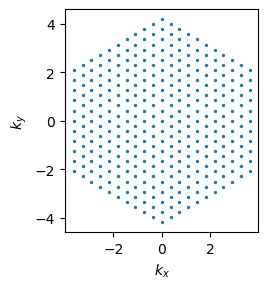

In [17]:
fig1=utils_auto.plot_kspace(kspace=ham.k_space)

## Task 2: Check energy dispersion for non-interacting term

In [18]:
t0 = "t0" if hasattr(ham,'t0') else 't_0'
t1 = "t1" if hasattr(ham,'t1') else 't_1'
U0 = "U0" if hasattr(ham,'U0') else 'U_0'
U1 = "U1" if hasattr(ham,'U1') else 'U_1'

In [19]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

setattr(ham,t1,1.0)
setattr(ham,t0,0)

In [20]:
h_nonint = ham.generate_non_interacting()

In [21]:
wf,en= HF.diagonalize(h_nonint) # or HF.diagonalize

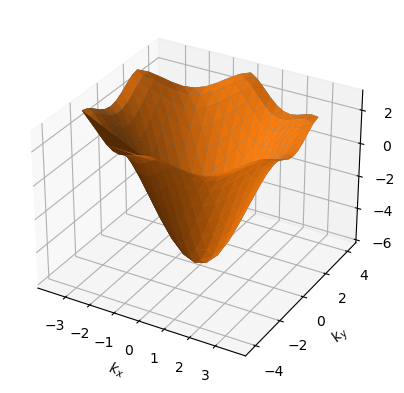

In [22]:
utils_auto.plot_2d_bandstructure(ham,en)

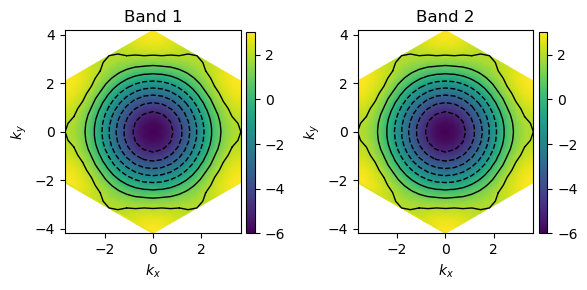

In [23]:
fig2=utils_auto.plot_2d_false_color_map(ham,en)

## Task 3: Infinitesemial U limit

In [24]:
ham_int= module.HartreeFockHamiltonian(N_shell=10, )
setattr(ham_int,t1,1.0)
setattr(ham_int,t0,0)
setattr(ham_int,U0,1e-5)
setattr(ham_int,U1,0)

In [25]:
wf,en= HF.diagonalize(ham_int.generate_non_interacting())
exp_val= HF.get_exp_val(wf,en,1/2,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [26]:
wf_int, en_int, exp_val_int= HF.solve(ham_int,exp_val,99)

Convergence reached at iteration 0


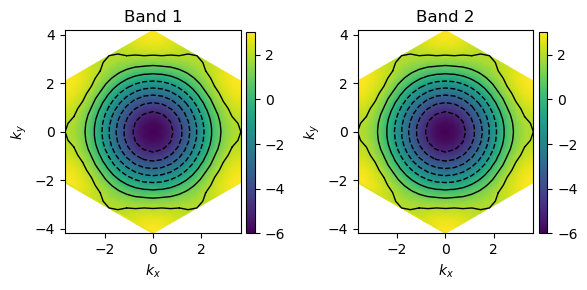

In [27]:
fig3=utils_auto.plot_2d_false_color_map(ham_int,en_int)

## Task 4: Large U limit + Large T limit (T=U)i

In [28]:
ham_int= module.HartreeFockHamiltonian(N_shell=10, )
setattr(ham_int,t1,1.0)
setattr(ham_int,t0,0)
setattr(ham_int,U0,1e5)
setattr(ham_int,U1,0)
setattr(ham_int,'T',1e5/1.8)


In [29]:
h_nonint=ham_int.generate_non_interacting()
h_nonint[0,0,:]-=100
wf,en=HF.diagonalize(h_nonint)
exp_val=HF.get_exp_val(wf,en,0.5,0)

In [30]:
wf_int, en_int, exp_val_int=HF.solve(ham_int,exp_val,100)

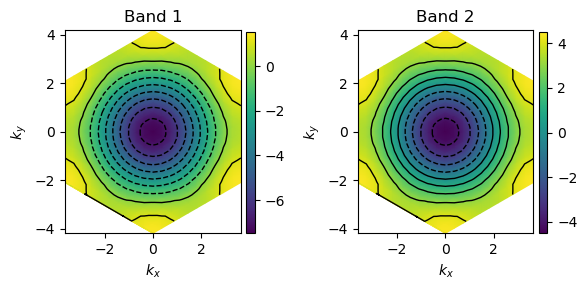

In [31]:
fig4=utils_auto.plot_2d_false_color_map(ham_int,en_int)

In [32]:
utils_auto.print_gap(ham_int,exp_val,en_int,1)

Gap is -6.02
U/T is 47245.56
mean_U is 49848.94


# Auto eval

## Task 1

In [33]:
result1 = utils_auto.vision_eval(
    fig=fig1, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics1.md', image='image1.md', paper=paper)
    )


#################### THINKING ####################

Let me analyze the image based on the problem and rubric provided.

**The Problem**: 
- The Hamiltonian is given in second quantized form for a triangular lattice.
- The problem involves Hartree-Fock calculations with dispersion relation and interactions defined in momentum space.

**The Rubric**:
1. The image should show a momentum space mesh in the first Brillouin zone (BZ) of the problem.
2. I need to check the point group symmetry.

Looking at the image:
- The image shows a hexagonal arrangement of points in k-space.
- The axes are labeled as kx and ky, confirming this is momentum space.
- The points range approximately from -4 to 4 in ky and from -3 to 3 in kx.

For a triangular lattice:
- The real space lattice is triangular.
- The reciprocal (momentum) space lattice should form a hexagon for the first Brillouin zone.
- The first Brillouin zone of a triangular lattice is a regular hexagon.

Point group symmetry:
- A triangular 

In [34]:
answer1=utils_auto.extract_result_content(result1['text'])

## Task 2

In [35]:
result2 = utils_auto.vision_eval(
    fig=fig2, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics2.md', image='image2.md', paper=paper)
    )


#################### THINKING ####################

I need to analyze the band structure plots shown in the image, focusing on symmetry in the context of a triangular lattice. Let me work through the rubric points systematically:

1. First, identify the shape of the Brillouin zone boundary and confirm it matches what's expected for a triangular lattice.

Looking at the image, I can see that the boundary of the colored region has a hexagonal shape. This is indeed the expected shape for the first Brillouin zone of a triangular lattice. In real space, a triangular lattice has six-fold rotational symmetry, and its reciprocal lattice (and thus the Brillouin zone) is also hexagonal.

2. Next, examine the symmetry of the energy distribution shown by the false color plot:

2.1 Identify the highest energy regions (yellow):
The highest energy regions (yellow) appear to form a hexagonal pattern around the boundary of the Brillouin zone.

2.2 Trace the pattern of energy variation across the zone:

In [36]:
answer2=utils_auto.extract_result_content(result2['text'])

## Task 3

In [37]:
result3 = utils_auto.vision_eval(
    fig=fig3, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics3.md', image='image3.md', paper=paper, Gap=0,nu=1/2)
    )


#################### THINKING ####################

Let me analyze this image and problem systematically according to the rubric:

1. First, I need to identify the shape of the Brillouin zone boundary from the image.
   - Looking at the image, I can see that the Brillouin zone boundary has a hexagonal shape, which is indeed expected for a triangular lattice. This is correct.

2. Examination of the symmetry of the energy distribution shown in the false color plot:
   
   2.1 Identifying the highest energy regions (yellow):
   - The highest energy regions (yellow) appear at the corners of the hexagonal Brillouin zone.
   
   2.2 Tracing the pattern of energy variation across the zone:
   - The energy decreases radially from the corners (yellow) to the center (purple), showing circular/radial contour lines.
   - The contours form concentric rings, indicating isotropic behavior in the energy distribution.
   
   2.3 Determining rotational and mirror symmetries:
   - The energy distributio

In [38]:
answer3=utils_auto.extract_result_content(result3['text'])

## Task 4

In [39]:
result4 = utils_auto.vision_eval(
    fig=fig4, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics4.md', image='image4.md', paper=paper,nu=1/2,U_int='U=1e5 and T=1e5/1.8, so the gap should smear to 0'
    ))


#################### THINKING ####################

I need to analyze the image showing two band structure plots (Band 1 and Band 2) in the first Brillouin zone after a self-consistent Hartree-Fock calculation. Let me go through the rubric criteria systematically:

1. **Brillouin zone shape**: 
   - The plots show a hexagonal boundary, which is indeed the correct shape for a triangular lattice's first Brillouin zone. This matches what's expected.

2. **Symmetry of energy distribution**:
   2.1 **Highest energy regions (yellow)**: In both Band 1 and Band 2, the highest energy regions (yellow) appear at the corners of the hexagon.
   
   2.2 **Energy variation pattern**: Both bands show a radially symmetric pattern with energy decreasing from the corners toward the center. The energy contours form concentric patterns around the center.
   
   2.3 **Rotational and mirror symmetries**: The energy distribution shows:
      - 6-fold rotational symmetry (C6)
      - Multiple mirror planes (6

In [40]:
answer4=utils_auto.extract_result_content(result4['text'])

In [41]:
utils_auto.save_final_answer(paper,trial_idx,answer1,answer2,answer3,answer4)

Final answer record for '3' saved to final_answer.yaml
